In [13]:
'''
Python 3 code for DECDG data analysis exercise.
'''
# Step 0. Setup
# 0.1 Imports: the following modules are required to reproduce
#     execution result step by step.
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# 0.2 plotting configurations
plt.figure(figsize=(20,10))
sns.set(font_scale=1.1)
sns.set_context("poster")
sns.set_style("white")
sns.set_palette(sns.color_palette("Greys_d"))

In [2]:
# Step 1. Retrieve life expectancy data from World Bank API
# Following the WDI API documentation, I constructed the API query as below to pull data as a JSON file.
URL = 'http://api.worldbank.org/countries/all/indicators/SP.DYN.LE00.IN?date=1960:2017&per_page=15048&format=json'

In [3]:
r = requests.get(URL)

In [4]:
# Step 2. Data Wrangling (structuring semi-structured JSON file into tabular data, then impute missing values)
# 2.1 Structure data
#     To do this, I will flatten out nested JSON format as tabular DataFrame.
df = pd.io.json.json_normalize(r.json()[1])

In [5]:
# 2.2 Selecting country id, country name, year, and life expectancy value columns.
df = df[['country.value','date','value']]

# 2.3 Normalize column names -- Pandas likes snake case.
df.columns = ['country', 'year', 'life_expectancy']

In [6]:
# 2.4 Identify data quality problem:
# 2.4.1 Problem 1: Missing values in "life_expectancy" column
#       Because the missing data is small and will not bias the
#       analysis outcome, there is no need to treat it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 3 columns):
country            15048 non-null object
year               15048 non-null object
life_expectancy    13498 non-null object
dtypes: object(3)
memory usage: 352.8+ KB


In [7]:
# 2.4.2 Problem 2: incorrect data type in DataFrame.
# For this, I will simply convert "year" and "life_expectancy" string value
# for calculation.
df.life_expectancy = pd.to_numeric(df.life_expectancy)
df.year = df.year.astype('int')

In [8]:
# 2.5 Save cleaned data
df.to_pickle('life_expectancy_data_cleaned.pkl')
df = pd.read_pickle('life_expectancy_data_cleaned.pkl')

Step 3. Conduct exploratory data analysis (no document required).

In [9]:
# Step 4. Choose one aspect or trend of the dat worth highlighting.
#         Life expectancy is known to have closely correlated with
#         income level, which is also a WDI indicator and included
#         in the life expectancy dataset.
#         So, I will take a closer look at this correlation.

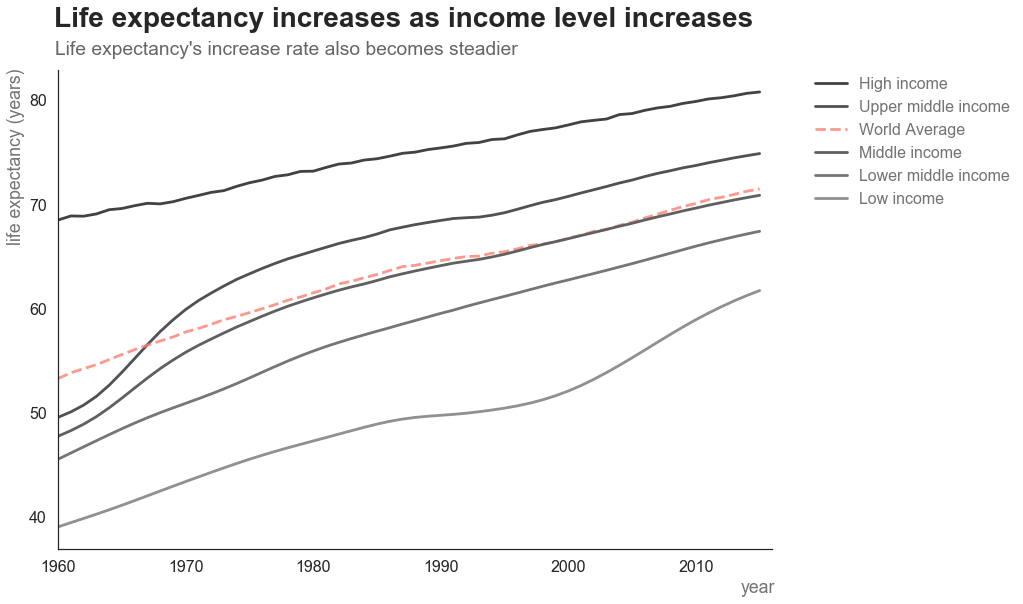

In [49]:
# Step 5. Produce one high quality chart that will convey the main finding of analysis
df[df.country=='High income'].life_expectancy.groupby(df.year).mean().plot.line(label='High income')
df[df.country=='Upper middle income'].life_expectancy.groupby(df.year).mean().plot.line(label='Upper middle income')
world_avg = df.life_expectancy.groupby(df.year).mean().plot.line(label='World Average', color='salmon', linestyle='dashed', alpha=0.8)
df[df.country=='Middle income'].life_expectancy.groupby(df.year).mean().plot.line(label='Middle income')
df[df.country=='Lower middle income'].life_expectancy.groupby(df.year).mean().plot.line(label='Lower middle income')
df[df.country=='Low income'].life_expectancy.groupby(df.year).mean().plot.line(label='Low income')

plt.suptitle("Life expectancy increases as income level increases", fontsize=28, fontweight='semibold')
plt.title("Life expectancy's increase rate also becomes steadier", x=0.32, y=1.02, color='0.4')
plt.xlabel('year', color='0.45', x=0.98)
plt.ylabel('life expectancy (years)', color='0.45', y=0.82)

sns.despine(top=True, right=True)#, left=True, bottom=True)
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
for text in legend.get_texts():
    plt.setp(text, color='0.45')

In [50]:
# Step 6: Summarize finding into one short paragraph (see one-page report please).

C'est la fin.